<a href="https://colab.research.google.com/github/joanacoyle/creating-cohorts-of-songs/blob/main/Project_Creating_Cohorts_Songs_JoanaCoyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Creating Cohorts of Songs - Joana Coyle

## Problem Objective:
As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs.  
 The goal is to better understand the various factors that create a cohort of songs.


### Step 1: Initial data inspection and data cleaning.

#### 1.1: Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers.

Methods and Findings

♦ Downloaded and imported all required libraries.

♦ Loaded the dataset and reviewed the first 5 rows.

♦ Saved an untouched copy of the original dataset to preserve integrity.

♦ Checked the dataset shape and confirmed there were no duplicates using the duplicated() function.

♦ After running df.info(memory_usage='deep'), I created a DataFrame containing only numeric columns and applied downcasting.
As a result, memory usage decreased from 744.2 KB to 706.0 KB.

♦ Verified that there were no missing values.

♦ Used the isin function to check for binary columns; none were found.

♦ Created a DataFrame of categorical columns and applied .nunique() to get the number of unique values for each. From this, I inferred that:

There are 954 unique song names (some songs may appear more than once if repeated across versions or albums).

The songs come from 90 different albums.

These albums/songs span 57 distinct release dates.

Each song has its own Spotify ID → 1610 unique IDs (likely 1610 songs total).

Spotify also assigns a unique URI for each track (also 1610 unique values).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [7]:
import statsmodels
print(statsmodels.__version__)

0.14.6


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
path = "/content/"
df = pd.read_csv(path + "rolling_stones_spotify.csv")

print(df.head())

   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

In [10]:
original_df= df.copy()


In [11]:
df.shape

(1610, 18)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [14]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [15]:
df_numeric = df.select_dtypes(include='number')
df_numeric.columns

Index(['Unnamed: 0', 'track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms'],
      dtype='object')

In [16]:
df[df_numeric.columns] = df_numeric.apply(pd.to_numeric, downcast='integer')

In [17]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int16  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int8   
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int8   


In [18]:
df.isnull().sum()

,0
Unnamed: 0,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0


In [19]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [20]:
num_cols = df.select_dtypes(include=['number'])
binary_cols = num_cols.columns[num_cols.isin([0,1]).all()]
print("Binary columns are:", list(binary_cols))

Binary columns are: []


In [21]:
print(df.select_dtypes(include=['number']).isin([0,1]).all())

Unnamed: 0          False
track_number        False
acousticness        False
danceability        False
energy              False
instrumentalness    False
liveness            False
loudness            False
speechiness         False
tempo               False
valence             False
popularity          False
duration_ms         False
dtype: bool


In [22]:
cat_cols = df.select_dtypes(include=['object']).columns

print("Categorical columns:", list(cat_cols))

Categorical columns: ['name', 'album', 'release_date', 'id', 'uri']


In [23]:
df[cat_cols].nunique()

,0
name,954
album,90
release_date,57
id,1610
uri,1610


♦ Used the describe function on num_col only and here are my observations:
- track_number: average = 8.6, range = 1 to 47
- acousticness: average = 0.25, range = 0.000009 to 0.994
- danceability: average = 0.47, range = 0.104 to 0.887
- energy: average = 0.79, range = 0.141 to 0.999
- instrumentalness: average = 0.16, range = 0.000 to 0.996
- liveness: average = 0.49, range = 0.0219 to 0.998
- loudness: average = –6.97 dB, range = –24.4 to 1.0 dB
- speechiness: average = 0.07, range = 0.0232 to 0.624
- tempo: average = 126 BPM, range = 46.5 to 216.3
- valence: average = 0.58, range = 0.0 to 0.974
- popularity: average = 20.8, range = 0 to 80
- duration_ms: average = 257,736 ms (~4.3 min), range = 21,000 ms (~21 sec) to 981,866 ms (~16.4 min)


In [24]:
print(num_cols.describe())

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

Boxplots – Outlier Treatment:  

♦ track_number: Outliers kept (valid long albums).

♦ acousticness: Outliers kept (acoustic style).

♦ danceability: No outliers → no treatment.

♦ energy: Outliers kept (slow songs).

♦ instrumentalness: Outliers kept (instrumental tracks).

♦ liveness: No extreme outliers → no treatment.

♦ loudness: Outliers kept (quiet tracks).

♦ speechiness: Outliers kept (rap/spoken word).

♦ tempo: Outliers kept (musical variety).

♦ valence: No outliers → no treatment.

♦ popularity: Outliers kept (popular tracks).

♦ duration_ms: Outliers kept (short/long versions).

In conclusion, no outliers were removed. The values reflect genuine musical characteristics (e.g., long albums, acoustic style, rap/spoken word, quiet tracks, tempo variety, etc.) or show no extreme deviations. Removing them would risk losing meaningful variation in the dataset.

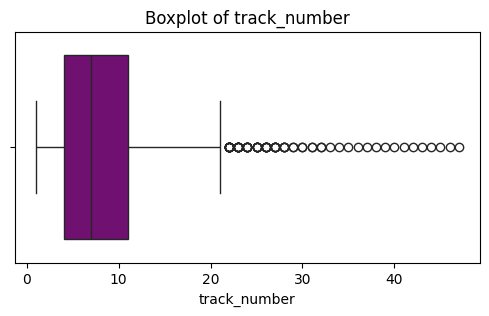

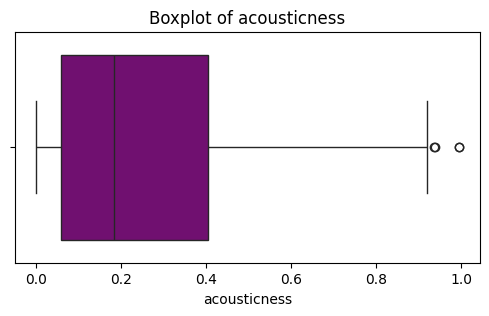

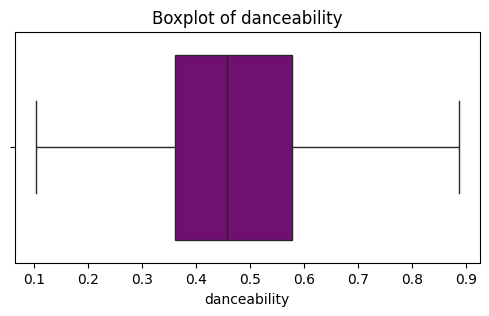

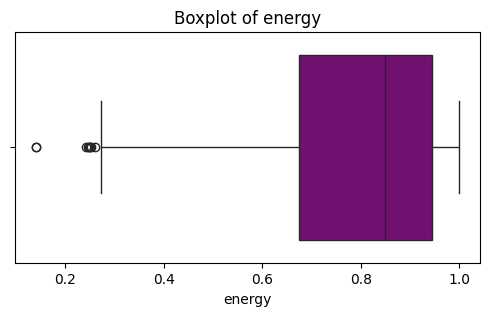

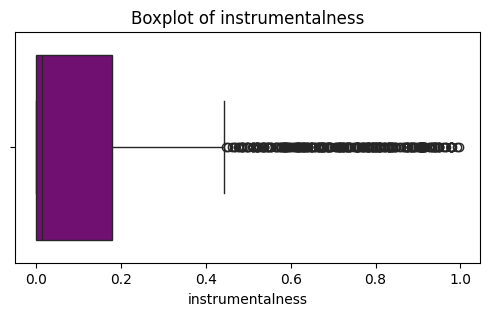

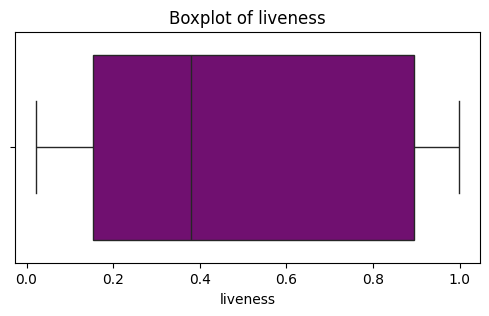

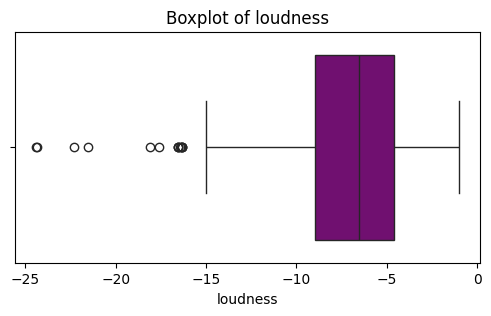

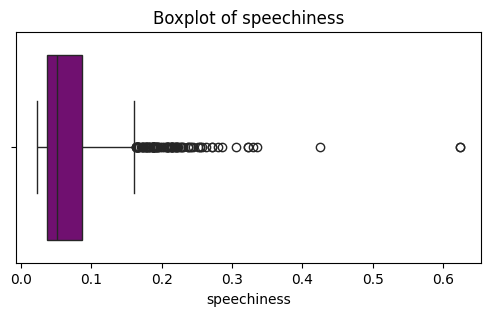

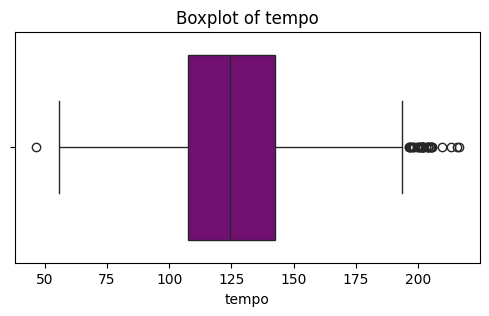

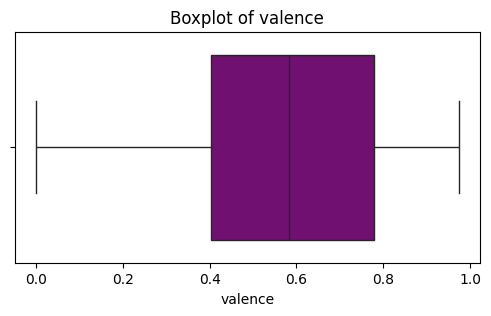

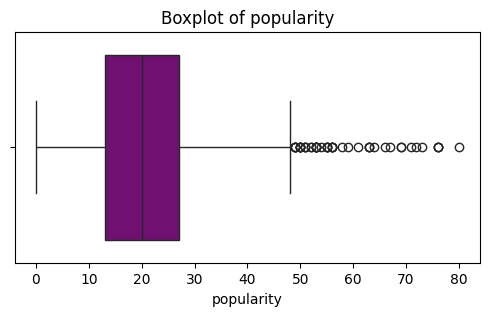

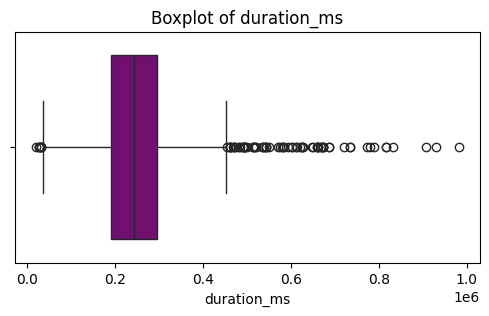

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    "track_number", "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "loudness", "speechiness", "tempo", "valence", "popularity", "duration_ms"
]

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color="purple")
    plt.title(f"Boxplot of {col}")
    plt.show()


#### 1.2: Check for any instances of erroneous entries and rectify them as needed.

♦ Dropped the column "Unnamed: 0" because it had no apparent use.

♦ Confirmed there are no duplicate rows in the dataset.

♦ Verified there are no missing (null) values.

In [26]:
df = df.drop(columns=["Unnamed: 0"])
df.shape


(1610, 17)

In [27]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []


In [28]:
df.isna().sum()

,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0
instrumentalness,0


### Step 2: Refine the data for further processing based on your findings.

♦ Converted the release_date column to datetime64[ns] for easier extraction of year, month, and other time-based features.  

♦ Created a new column with the release year and generated a distribution of songs per year.  

♦ Dropped release_date and kept only year to avoid redundancy and keep features clean for clustering.

♦ Dropped the columns id and uri, since they are unique identifiers and do not add meaningful information for the clustering analysis.

In [29]:
print(df.dtypes)

name                 object
album                object
release_date         object
track_number           int8
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity             int8
duration_ms           int32
dtype: object


In [30]:
print(df["release_date"].head())

0    2022-06-10
1    2022-06-10
2    2022-06-10
3    2022-06-10
4    2022-06-10
Name: release_date, dtype: object


In [31]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
print(df["release_date"].dt.year.head())

0    2022
1    2022
2    2022
3    2022
4    2022
Name: release_date, dtype: int32


In [32]:
df["year"] = df["release_date"].dt.year
songs_per_year = df["year"].value_counts().sort_index()
print(songs_per_year)

year
1964     60
1965    108
1966     63
1967    102
1968     20
1969     27
1970     47
1971     63
1972     81
1973     20
1974     20
1976     16
1977     36
1978     54
1980     20
1981     22
1982     12
1983     20
1986     22
1989     24
1991     34
1994     15
1995     28
1997     26
2004     46
2005     16
2011     17
2012     45
2016    108
2017     82
2018     76
2019     91
2020     64
2021     79
2022     46
Name: count, dtype: int64


In [33]:
df = df.drop(columns=["release_date"])
print(df.head())

                          name               album  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC             1   
1   Street Fighting Man - Live  Licked Live In NYC             2   
2           Start Me Up - Live  Licked Live In NYC             3   
3  If You Can't Rock Me - Live  Licked Live In NYC             4   
4            Don’t Stop - Live  Licked Live In NYC             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993   

In [34]:
print(df.columns.tolist())

['name', 'album', 'track_number', 'id', 'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms', 'year']


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   track_number      1610 non-null   int8   
 3   id                1610 non-null   object 
 4   uri               1610 non-null   object 
 5   acousticness      1610 non-null   float64
 6   danceability      1610 non-null   float64
 7   energy            1610 non-null   float64
 8   instrumentalness  1610 non-null   float64
 9   liveness          1610 non-null   float64
 10  loudness          1610 non-null   float64
 11  speechiness       1610 non-null   float64
 12  tempo             1610 non-null   float64
 13  valence           1610 non-null   float64
 14  popularity        1610 non-null   int8   
 15  duration_ms       1610 non-null   int32  
 16  year              1610 non-null   int32  


In [36]:
ids = df[["id", "uri"]]
df = df.drop(columns=["id", "uri"])
df.head()

,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
0,Concert Intro Music - Live,Licked Live In NYC,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022
1,Street Fighting Man - Live,Licked Live In NYC,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022
2,Start Me Up - Live,Licked Live In NYC,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022
3,If You Can't Rock Me - Live,Licked Live In NYC,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022
4,Don’t Stop - Live,Licked Live In NYC,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022


In [37]:
df = df.drop(columns=["id", "uri"], errors="ignore")

In [38]:
print(df.columns.tolist())

['name', 'album', 'track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms', 'year']


### Step 3: Perform exploratory data analysis and feature engineering.

#### 3.1: Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album.

♦ As seen in the previous analysis, the popularity column shows that most songs score between 10–30, while only a few reach 50–80. Therefore, I will define songs with a score above 50 as popular.  
  
♦ Grouped the popular songs by album, and identified the two albums with the highest counts of popular tracks: Sticky Fingers (Remastered) and Exile On Main Street (2010 Re-Mastered).

In [39]:
popular_songs = df[df["popularity"] > 50]

In [40]:
album_counts = popular_songs["album"].value_counts()
print(album_counts.head())

album
Sticky Fingers (Remastered)                6
Exile On Main Street (2010 Re-Mastered)    4
Tattoo You (2009 Re-Mastered)              3
Some Girls                                 3
December’s Children (And Everybody’s)      2
Name: count, dtype: int64


In [41]:
print(album_counts.sort_values(ascending=False))

album
Sticky Fingers (Remastered)                   6
Exile On Main Street (2010 Re-Mastered)       4
Tattoo You (2009 Re-Mastered)                 3
Some Girls                                    3
December’s Children (And Everybody’s)         2
Out Of Our Heads                              2
Goats Head Soup (Remastered 2009)             2
Emotional Rescue (2009 Re-Mastered)           2
Beggars Banquet (50th Anniversary Edition)    2
Let It Bleed                                  2
Between The Buttons                           2
Aftermath                                     2
Voodoo Lounge (Remastered 2009)               1
Bridges To Babylon (Remastered)               1
It's Only Rock 'N' Roll (2009 Re-Mastered)    1
Black And Blue (Remastered 2009)              1
Aftermath (UK Version)                        1
The Rolling Stones                            1
Name: count, dtype: int64


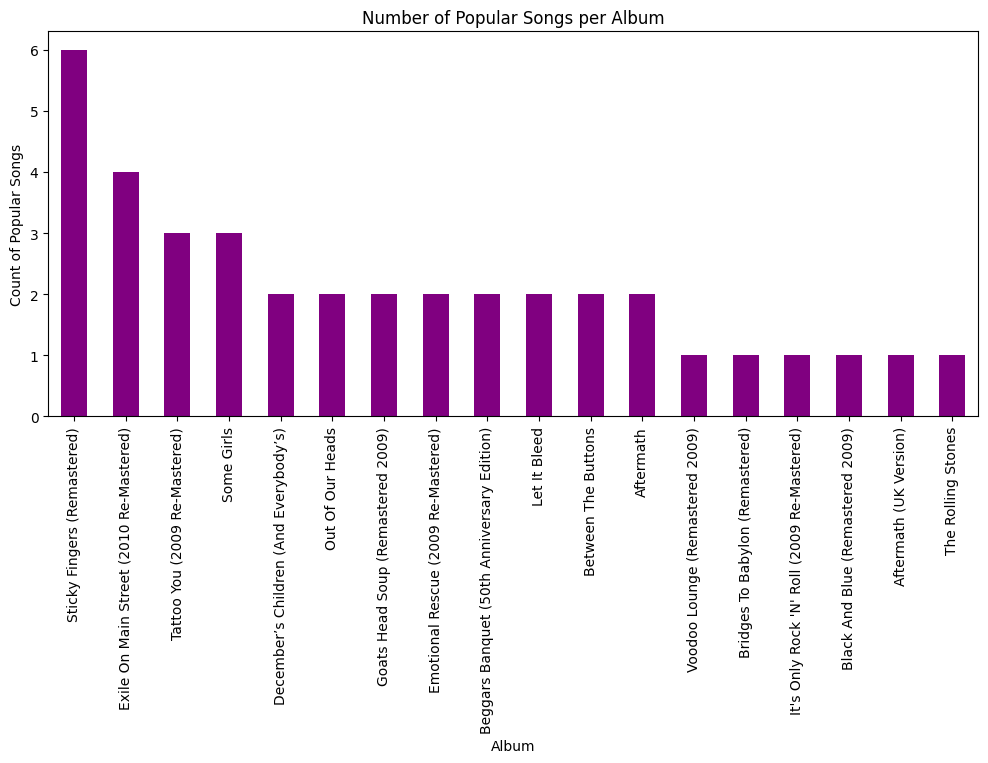

In [42]:
album_counts.plot(kind="bar", figsize=(12,5), color="purple")
plt.title("Number of Popular Songs per Album")
plt.xlabel("Album")
plt.ylabel("Count of Popular Songs")
plt.show()


#### 3.2: Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns.

♦ I checked for multicollinearity and found that some features (energy, danceability, tempo, and valence) show very high correlation with the rest. These features are highly redundant, meaning they provide almost the same information. Keeping all of them could distort clustering results, so I may need to drop some to simplify the model and avoid redundancy.  
  
♦   From the correlation matrix, I observed that danceability and valence are moderately correlated (0.55), so I will drop valence. In addition, energy and loudness show a very strong positive correlation (0.70), so I will drop loudness. These are the two features I feel confident dropping, as both the correlation matrix and the multicollinearity (VIF) analysis support this decision

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = [
    'popularity',"acousticness","danceability","energy","instrumentalness",
    "liveness","loudness","speechiness","tempo","valence"
]

X = df[features]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature        VIF
0        popularity   4.100533
1      acousticness   2.520180
2      danceability  20.221037
3            energy  37.937008
4  instrumentalness   1.431063
5          liveness   5.540295
6          loudness   8.481534
7       speechiness   4.604116
8             tempo  19.314867
9           valence  14.949606


                  popularity  acousticness  danceability    energy  \
popularity          1.000000      0.108046      0.141205 -0.057272   
acousticness        0.108046      1.000000      0.070017 -0.363819   
danceability        0.141205      0.070017      1.000000 -0.300536   
energy             -0.057272     -0.363819     -0.300536  1.000000   
instrumentalness   -0.010612      0.061403     -0.031812  0.120261   
liveness           -0.205845     -0.117739     -0.516387  0.511188   
loudness            0.156323     -0.237083     -0.249406  0.698039   
speechiness        -0.136745     -0.021774     -0.322684  0.417214   
tempo              -0.061061     -0.171003     -0.324398  0.201885   
valence             0.065333     -0.138803      0.546210  0.046217   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
popularity               -0.010612 -0.205845  0.156323    -0.136745 -0.061061   
acousticness              0.061403 -0.117739 -0.237083    -0.021774

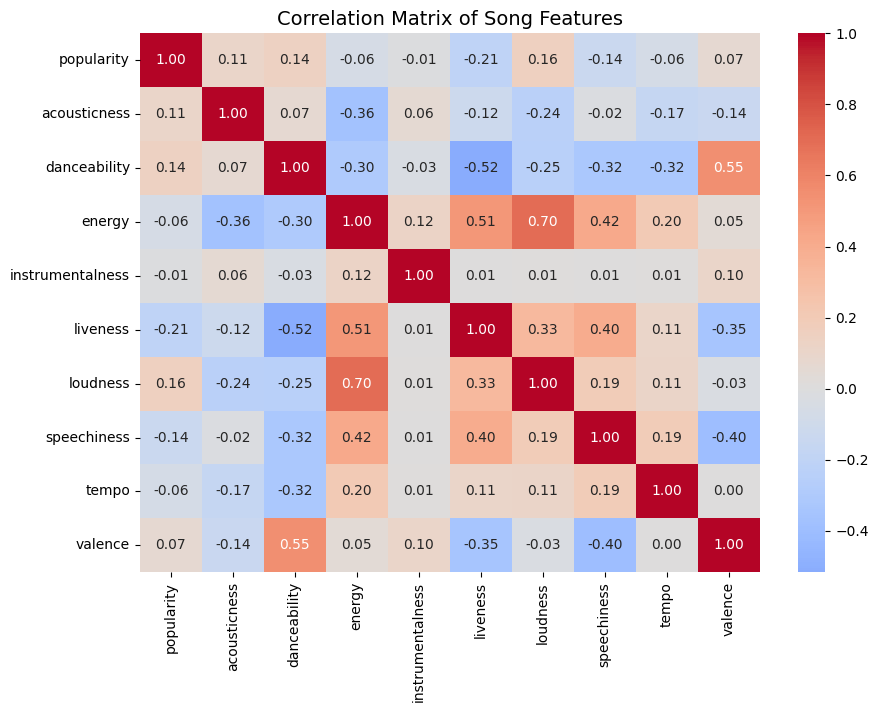

In [44]:
features = [
    "popularity","acousticness","danceability","energy","instrumentalness",
    "liveness","loudness","speechiness","tempo","valence"
]

corr = df[features].corr()

print(corr)

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation Matrix of Song Features", fontsize=14)
plt.show()

In [45]:
df = df.drop(columns=["valence", "loudness"])
print(df.columns.tolist())

['name', 'album', 'track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'popularity', 'duration_ms', 'year']


#### 3.3: Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved.

♦ To identify which features are most strongly linked to popularity, I created a correlation table using the selected features: acousticness, danceability, energy, instrumentalness, liveness, speechiness and tempo. The results show that all correlations are weak, meaning none of the features are strong predictors of popularity. However, the three features with the strongest links are:  

-Liveness: –0.21 (live-sounding songs are less popular)  
-Spoken: –0.14 (spoken songs are less popular )  
-Danceability → 0.14 (more danceable songs are slightly more popular)  

♦ I explored more relationships between popularity and audio features, and the findings are:

-Duration: Medium-length songs are slightly more popular than very short or very long ones.

-Instrumentalness: Songs with less instrumental content tend to be a bit more popular.

-Acousticness: Songs with higher acoustic qualities show higher popularity on average.

♦ To explore the relationship between time and popularity, I plotted the data, which showed:  

-Popularity vs Release Year (all years sorted)  

Older albums (late 1960s–1980s) generally show higher average popularity than recent ones.  
Popularity declines for newer releases, with most post-2000 albums having lower averages.  

-Top 5 Years by Popularity  
  
The peak years were 1981, 1969, 1994, 1973, and 1976, all scoring much higher than other years.  
These standout years highlight periods when albums produced more songs that remain popular.




In [46]:
features = [
    "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "speechiness", "tempo"
]
corr_table = df[features + ["popularity"]].corr()["popularity"].sort_values(ascending=False)

print(corr_table)

popularity          1.000000
danceability        0.141205
acousticness        0.108046
instrumentalness   -0.010612
energy             -0.057272
tempo              -0.061061
speechiness        -0.136745
liveness           -0.205845
Name: popularity, dtype: float64


/tmp/ipython-input-2298015767.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pop = df.groupby("duration_ms_bin")["popularity"].mean()


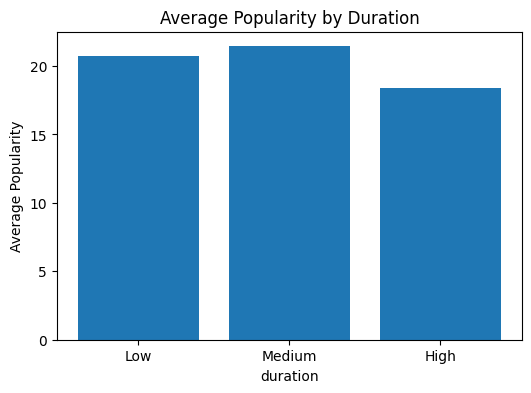

In [47]:
df["duration_ms_bin"] = pd.cut(df["duration_ms"], bins=3, labels=["Low","Medium","High"])

avg_pop = df.groupby("duration_ms_bin")["popularity"].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_pop.index.astype(str), avg_pop.values)
plt.title("Average Popularity by Duration")
plt.xlabel("duration")
plt.ylabel("Average Popularity")
plt.show()



/tmp/ipython-input-3614937499.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pop_liveness = df.groupby("instrumentalness_bin")["popularity"].mean()


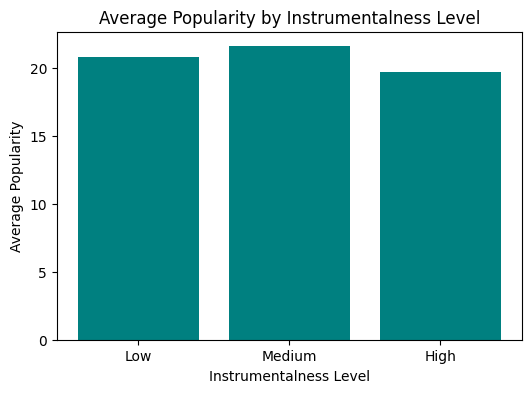

In [48]:
df["instrumentalness_bin"] = pd.cut(df["instrumentalness"], bins=3, labels=["Low","Medium","High"])

avg_pop_liveness = df.groupby("instrumentalness_bin")["popularity"].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_pop_liveness.index.astype(str), avg_pop_liveness.values, color="teal")
plt.title("Average Popularity by Instrumentalness Level")
plt.xlabel("Instrumentalness Level")
plt.ylabel("Average Popularity")
plt.show()

/tmp/ipython-input-2201362866.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pop_speech = df.groupby("acousticness_bin")["popularity"].mean()


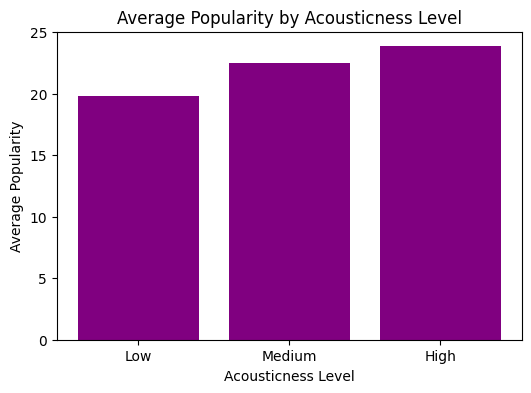

In [49]:
df["acousticness_bin"] = pd.cut(df["acousticness"], bins=3, labels=["Low","Medium","High"])

avg_pop_speech = df.groupby("acousticness_bin")["popularity"].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_pop_speech.index.astype(str), avg_pop_speech.values, color="purple")
plt.title("Average Popularity by Acousticness Level")
plt.xlabel("Acousticness Level")
plt.ylabel("Average Popularity")
plt.show()

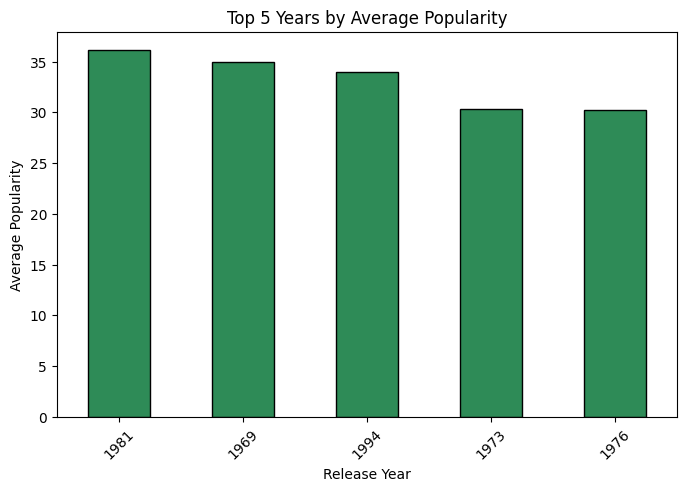

In [50]:
avg_pop_year = df.groupby("year")["popularity"].mean().sort_values(ascending=False)

top5_years = avg_pop_year.head(5)

plt.figure(figsize=(8,5))
top5_years.plot(kind="bar", color="seagreen", edgecolor="black")
plt.title("Top 5 Years by Average Popularity")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()

#### 3.4: Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations.

♦ Since I had already removed redundant features in earlier steps, I applied PCA (Principal Component Analysis) to the remaining features.

♦ PCA reduces many features into a few key components that retain most of the song information, cut noise, and make clusters easier to interpret and visualize.

♦ I scaled the numerical features with StandardScaler, as this is important before applying PCA or training models.

♦ I chose to start PCA with 2 components, compressing all features into two “summary features.” From this point onward, I will use only the X_pca data for clustering and analysis.  

♦ Calculated the cumulative explained variance to see how much total information is retained as more principal components are added.  

♦ With NumPy’s .argmax function, I found the minimum number of components needed to keep 90% of the data’s information.

♦ Since the variance explained with 2 components was too low, I increased to more components and check if more information is retained and the optimal number was 9 with 93.02%.


In [51]:
X = df.select_dtypes(include="number")
print(X.head())

   track_number  acousticness  danceability  energy  instrumentalness  \
0             1        0.0824         0.463   0.993          0.996000   
1             2        0.4370         0.326   0.965          0.233000   
2             3        0.4160         0.386   0.969          0.400000   
3             4        0.5670         0.369   0.985          0.000107   
4             5        0.4000         0.303   0.969          0.055900   

   liveness  speechiness    tempo  popularity  duration_ms  year  
0     0.932       0.1100  118.001          33        48640  2022  
1     0.961       0.0759  131.455          34       253173  2022  
2     0.956       0.1150  130.066          34       263160  2022  
3     0.895       0.1930  132.994          32       305880  2022  
4     0.966       0.0930  130.533          32       305106  2022  


In [52]:
X_scaled = StandardScaler().fit_transform(X)

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [54]:
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (1610, 11)
Shape after PCA: (1610, 2)


In [55]:
cum_explained = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cum_explained >= 0.90) + 1
print("Number of components to explain 90% variance:", n_components_90)

Number of components to explain 90% variance: 1


In [56]:
for i, var in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {var:.2%} variance explained")

cum_explained = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative explained variance:")
for i, cum in enumerate(cum_explained, start=1):
    print(f"PC{i}: {cum:.2%}")

PC1: 27.48% variance explained
PC2: 12.25% variance explained

Cumulative explained variance:
PC1: 27.48%
PC2: 39.73%


In [57]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [58]:
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (1610, 11)
Shape after PCA: (1610, 3)


In [59]:
cum_explained = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cum_explained >= 0.90) + 1
print("Number of components to explain 90% variance:", n_components_90)

Number of components to explain 90% variance: 1


In [60]:
for i, var in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {var:.2%} variance explained")

cum_explained = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative explained variance:")
for i, cum in enumerate(cum_explained, start=1):
    print(f"PC{i}: {cum:.2%}")

PC1: 27.48% variance explained
PC2: 12.25% variance explained
PC3: 10.12% variance explained

Cumulative explained variance:
PC1: 27.48%
PC2: 39.73%
PC3: 49.86%


In [61]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [62]:
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (1610, 11)
Shape after PCA: (1610, 4)


In [63]:
cum_explained = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cum_explained >= 0.90) + 1
print("Number of components to explain 90% variance:", n_components_90)

Number of components to explain 90% variance: 1


In [64]:
cum_explained = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative explained variance:")
for i, cum in enumerate(cum_explained, start=1):
    print(f"PC{i}: {cum:.2%}")


Cumulative explained variance:
PC1: 27.48%
PC2: 39.73%
PC3: 49.86%
PC4: 59.71%


In [65]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [66]:
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (1610, 11)
Shape after PCA: (1610, 9)


In [67]:
cum_explained = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cum_explained >= 0.90) + 1
print("Number of components to explain 90% variance:", n_components_90)

Number of components to explain 90% variance: 9


In [68]:
cum_explained = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative explained variance:")
for i, cum in enumerate(cum_explained, start=1):
    print(f"PC{i}: {cum:.2%}")


Cumulative explained variance:
PC1: 27.48%
PC2: 39.73%
PC3: 49.86%
PC4: 59.71%
PC5: 68.85%
PC6: 76.75%
PC7: 83.33%
PC8: 88.95%
PC9: 93.02%


### Step 4: Perform cluster analysis

#### 4.1: Identify the right number of clusters.

♦ Used the X_pca( PCA-reduced data)as input to clustering and performed the Elbow method to vizualise and decide how many clusters are optimal.  

♦ K in KMeans: k = number of clusters you ask the algorithm to form. Since the best value is unknown, we test several (e.g., 2–10) and compare WCSS (how tight clusters are).

♦ Elbow Method: Plot k (x-axis) vs. WCSS (y-axis).
The “elbow point” (curve bends) shows the best k, balancing accuracy and simplicity.

♦ From the elbow plot, we can see that the best clsters would be 3 to 4 and to make a decision we performed the siouette scores that measures how good the clustering is (Higher = better). The result was that ,comparing the two scores, the silhouette score is higher for k=3, which means clusters are more cohesive and better separated at 3 clusters than at 4.

In [69]:
k_values = range(1, 11)
wcss = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_pca).inertia_ for k in k_values]

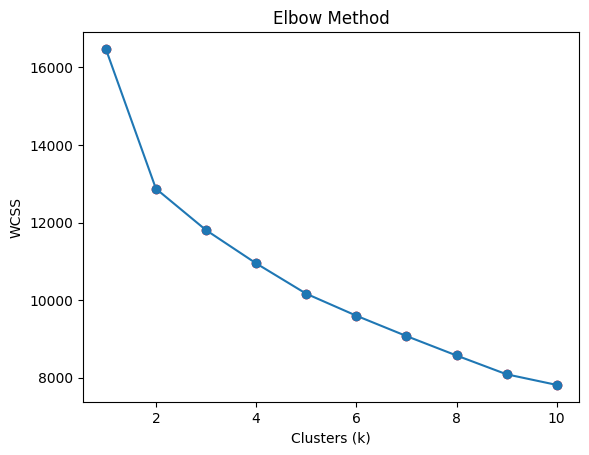

In [70]:
plt.plot(k_values, wcss, "o-")
plt.scatter(k_values, wcss, color="red")
plt.xlabel("Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()



In [71]:
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_pca)
labels3 = kmeans3.labels_
score3 = silhouette_score(X_pca, labels3)

In [72]:
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_pca)
labels4 = kmeans4.labels_
score4 = silhouette_score(X_pca, labels4)

In [73]:
print("Silhouette score for k=3:", score3)
print("Silhouette score for k=4:", score4)

Silhouette score for k=3: 0.19186816036908694
Silhouette score for k=4: 0.14053284586189047


#### 4.2: Use appropriate clustering algorithms.

♦ K-Means was the preferred algorithm because PCA reduced the data to uncorrelated components, which suits K-Means, and the method provides clusters that are both balanced and easy to interpret.  

♦ Created a new column called cluster, where each row is assigned a cluster number indicating the group it belongs to.  

♦ Visualized the KMeans clustering (k=3) on PCA-reduced data, with each song colored by cluster and red “X” markers showing the centroids (cluster centers).  

♦ The 3 clusters and their centroids are clearly separated, with only minor overlap at the boundaries, which is expected in real-world data and not a major concern.

In [74]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

df["cluster"] = labels

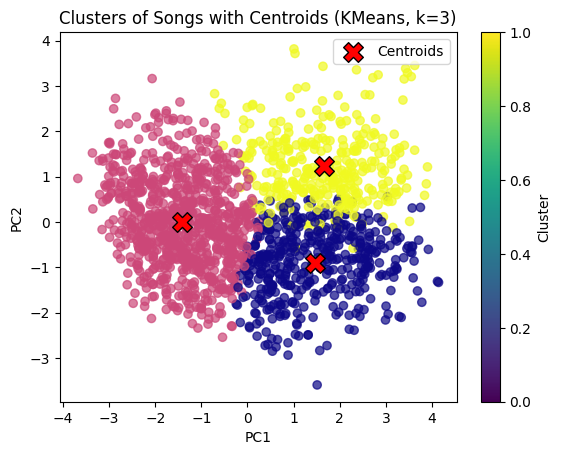

In [75]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="plasma", alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c="red", marker="X", s=200, edgecolor="black", label="Centroids")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters of Songs with Centroids (KMeans, k=3)")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()



#### 4.3: Define each cluster based on the features.

♦ Applied the groupby function to calculate average feature values for each cluster, creating cluster profiles that highlight the main musical traits defining each group.

♦ Plotted the average feature values per cluster to visually highlight differences in attributes such as danceability, energy, and tempo.

♦ Insights from the cluster summary:

Cluster 1: Most popular cluster. Best in danceability and acousticness, but has the lowest energy, liveness, and speechiness. The average year is 1977.

Cluster 2: Lowest in instrumentalness, but highest in liveness and duration. The average year is 2015.

Cluster 0:  Popularity almost equal to cluster 2. Characterized by the lowest danceability and the highest energy, instrumentalness, and speechiness.The average year is 2015.



In [76]:
cluster_summary = df.groupby("cluster").mean(numeric_only=True)
print(cluster_summary)

         track_number  acousticness  danceability    energy  instrumentalness  \
cluster                                                                         
0            6.659091      0.151038      0.362257  0.923743          0.191872   
1            6.803805      0.303994      0.549584  0.695320          0.171720   
2           15.854103      0.246652      0.405079  0.864669          0.107821   

         liveness  speechiness       tempo  popularity    duration_ms  \
cluster                                                                 
0        0.732709     0.106016  145.975848   17.836364  234118.595455   
1        0.244471     0.046987  118.263472   23.441141  229209.118906   
2        0.801499     0.078274  119.462371   17.954407  362245.273556   

                year  
cluster               
0        2001.100000  
1        1977.732461  
2        2015.057751  


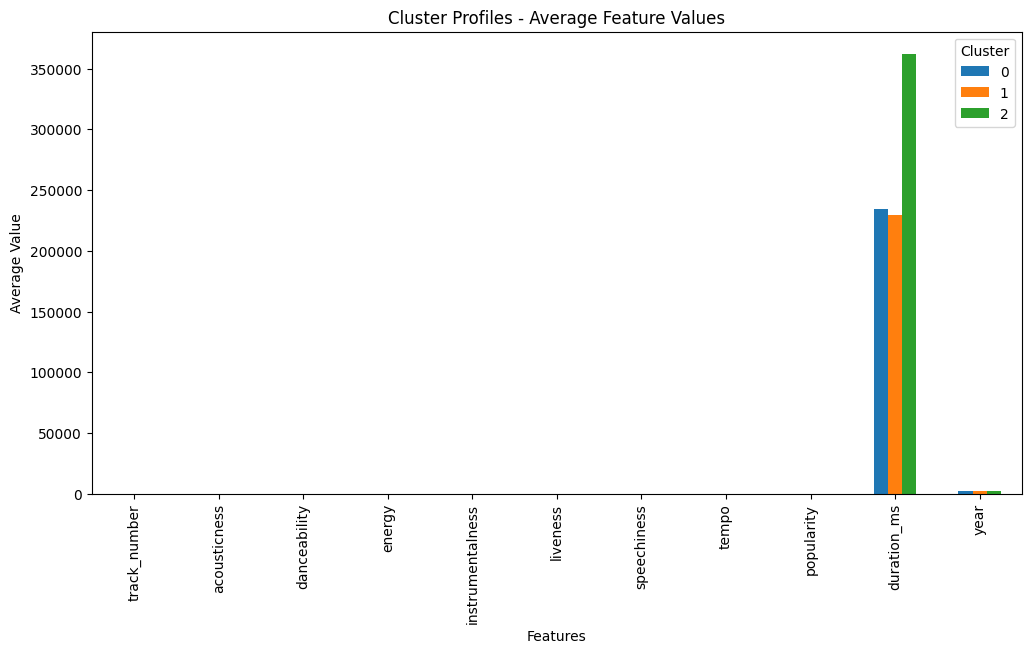

In [77]:
cluster_summary.T.plot(kind="bar", figsize=(12,6))
plt.title("Cluster Profiles - Average Feature Values")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.legend(title="Cluster")
plt.show()
